In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import data_utils_g1 as du
plt.style.use('seaborn')

path = du.open_file_general()
# Reading the dataset
data = pd.read_csv(path)
print("The shape of the dataframe is: ", data.shape)

The shape of the dataframe is:  (19237, 20)


In [2]:
data.describe()

,Unnamed: 0,ID,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,19237.0000,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,9618.0000,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,5553.3879,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,0.0000,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4809.0000,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,9618.0000,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,14427.0000,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,19236.0000,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


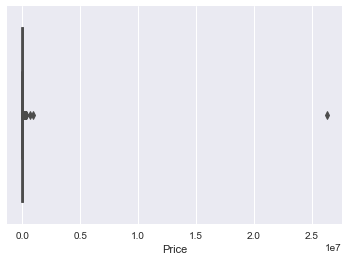

In [3]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Price'])
plt.show()

In [2]:
outlier_free_list=0
filtered_data=0

# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
 
 

removeOutliers(data, 'Price')

 
  
# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)

IQR value for column Price is: 16744.0
Shape of data after outlier removal is:  (18164, 20)


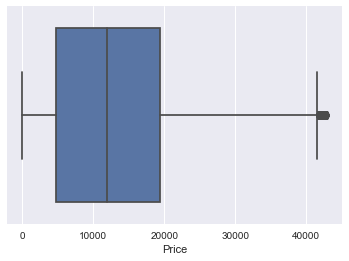

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Price'])
plt.show()

181


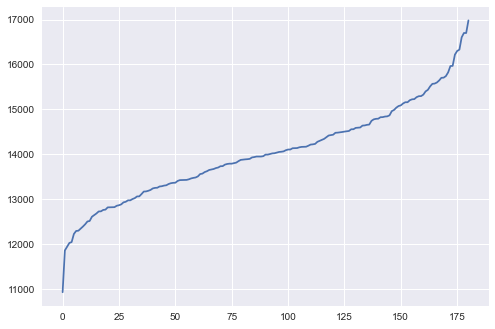

In [4]:
n = 100
a = len(data)
b = int(len(data)/n)
res = []
for i in range(b):
    x=0
    temp = n if a >= i*n+n else a-i*n
    for j in range(temp):
        x+= data.iloc[n*i+j]['Price']
    res.append(int(x/temp))
res.sort()
plt.plot(res)
print(b)

(array([6.37974813e-06, 8.93164738e-05, 2.93468414e-04, 3.63645643e-04,
        2.48810177e-04, 1.08455718e-04, 4.46582369e-05]),
 array([10920., 11786., 12652., 13518., 14384., 15250., 16116., 16982.]),
 [<matplotlib.patches.Polygon at 0x1c954bd62b0>])

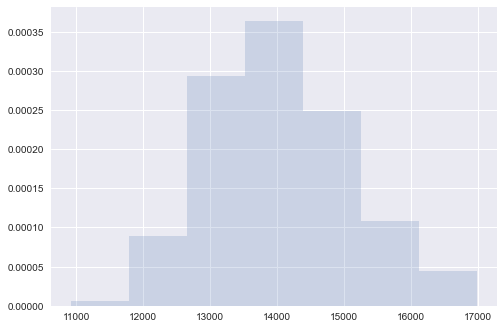

In [5]:
plt.hist(res, bins=7, density=True, histtype='stepfilled',
         alpha=0.2, label='histogram of data')

In [8]:
data
cat = data.Model.unique()
print(len(cat))

1395


In [10]:
data.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/IQRSanitized.csv',index=False,line_terminator='\n')